# Introducción
Clasificaremos si el usuario que visita un sitio web usa como sistema operativo Windows, Macintosh o Linux.

Para eso, cargaremos un pequeño archivo CSV de 170 registros. La muestra es muy pequeña, por lo cual corremos el riesgo de underfitting u overfitting.

Nuestra información de entrada son 4 características tomadas de una web que utiliza Google Analytics y son:

*   Duración de la visita en Segundos
*   Cantidad de Páginas Vistas durante la Sesión
*   Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc)
*   Suma del Valor de las acciones (cada acción lleva asociada una valoración de importancia)

Como la salida es discreta, asignaremos los siguientes valores a las etiquetas:

0 – Windows
1 – Macintosh
2 -Linux

## Importar las librerías
Antes de empezar vamos a importar las siguientes librerías:

- Pandas
- Numpy
- Sklearn
- Matplotlib
- Seaborn

In [1]:
import pandas as pd  # Librería para manejo de datos en estructuras tipo DataFrame
import numpy as np  # Librería para operaciones numéricas y matriciales
from sklearn import linear_model  # Para usar la regresión logística
from sklearn import model_selection  # Para dividir los datos en entrenamiento y prueba
from sklearn.metrics import confusion_matrix, classification_report  # Métricas de validación
import matplotlib.pyplot as plt  # Para graficar
import seaborn as sb  # Para visualizaciones estadísticas

%matplotlib inline  # Necesario en Google ColabJupyter para mostrar gráficos dentro del notebook


UsageError: unrecognized arguments: # Necesario en Google ColabJupyter para mostrar gráficos dentro del notebook


## Cargamos los datos de entrada del archivo csv

En este caso subiremos subir un primer archivo en forma local (el profesor te facilitirá los archivos) ejecutando lo siguiente:

In [2]:
from google.colab import files  # Permite subir archivos a Colab
uploaded = files.upload()  # Abre el selector de archivos en Colab

for fn in uploaded.keys():  # Iteramos sobre los archivos subidos
    name = fn  # Guardamos el nombre del archivo
dataframe = pd.read_csv(name, sep=",")  # Leemos el archivo CSV en un DataFrame
dataframe.head()  # Mostramos las primeras filas para inspección rápida


Saving usuarios_win_mac_lin.csv to usuarios_win_mac_lin (4).csv


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
# Tamaño del dataframe
dataframe.shape

(170, 5)

In [4]:
dataframe.describe()  # Muestra estadísticas básicas (media, min, max, cuartiles) de los datos


,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [5]:
print(dataframe.groupby('clase').size())  # Muestra cuántos registros hay por cada clase


clase
0    86
1    40
2    44
dtype: int64


**WARNING:**

Para aplicar una Regresión Logística pura, necesitamos manejar solo dos clases.
Si son más clases, deberíamos usar Regresión logística multinomial.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [6]:
# Unir clases 1 y 2 en una sola clase "1"
dataframe['clase'] = dataframe['clase'].replace({2: 1})


In [7]:
print(dataframe.groupby('clase').size())  # Muestra cuántos registros hay por cada clase

clase
0    86
1    84
dtype: int64


## Visualizamos los datos

Visualizamos en formato de historial las cuatro características de entrada con nombres “duración”, “páginas”,”acciones” y “valor” podemos ver gráficamente entre qué valores se comprenden sus mínimos y máximos y en qué intervalos concentran la mayor densidad de registros

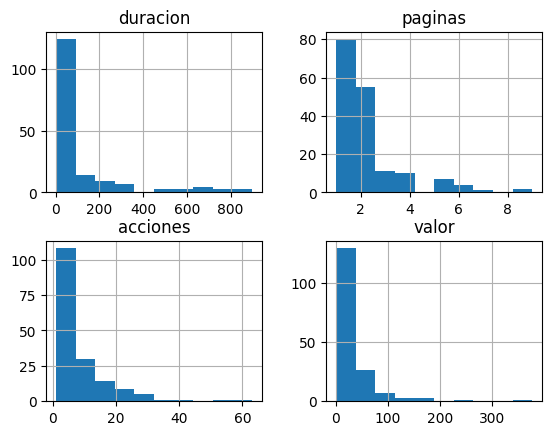

In [8]:
dataframe.drop(['clase'], axis=1).hist()  # Histogramas de las variables predictoras
plt.show()  # Mostrar los gráficos


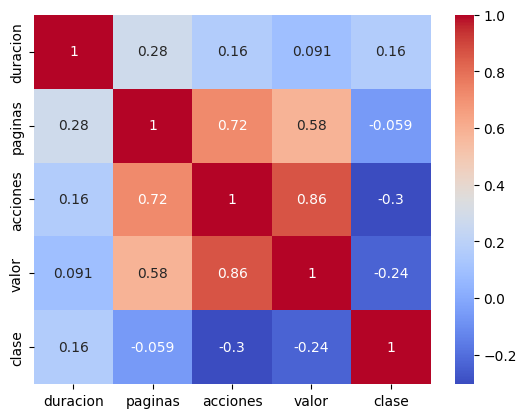

In [9]:
correlation = dataframe.corr()  # Calculamos correlación entre variables numéricas
sb.heatmap(correlation, annot=True, cmap="coolwarm")  # Mapa de calor de correlaciones
plt.show()  # Mostrar gráfico


## Creamos el modelo

Cargamos las variables de las 4 columnas de entrada en X excluyendo la columna “clase” con el método drop(). En cambio agregamos la columna “clase” en la variable y.

In [10]:
X = dataframe.drop(['clase'], axis=1)  # Variables de entrada (todas menos la columna "clase")
Y = dataframe['clase']  # Variable de salida (columna "clase")

# Dividimos los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, Y, test_size=0.3, random_state=1, shuffle=True
)


Y creamos nuestro modelo y hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y

In [11]:
modelo = linear_model.LogisticRegression(max_iter=200)  # Definimos modelo de regresión logística
modelo.fit(X_train, y_train)  # Entrenamos el modelo con datos de entrenamiento


LogisticRegression(max_iter=200)

Una vez compilado nuestro modelo, le hacemos clasificar todo nuestro conjunto de entradas X utilizando el método “predict(X)” y revisamos algunas de sus salidas y vemos que coincide con las salidas reales de nuestro archivo csv.

In [12]:
y_pred = modelo.predict(X_test)  # Hacemos predicciones con los datos de prueba

# Mostramos comparativa entre valores reales y predichos
comparacion = pd.DataFrame({
    "Real": y_test.values,       # Etiquetas originales
    "Predicción": y_pred         # Resultados del modelo
})

print(comparacion.head(20))  # Mostrar las primeras 20 filas para revisión



    Real  Predicción
0      1           1
1      0           0
2      1           0
3      1           1
4      0           0
5      0           1
6      1           0
7      1           1
8      1           0
9      1           0
10     1           1
11     1           1
12     0           0
13     0           1
14     0           0
15     1           0
16     1           1
17     0           0
18     1           1
19     0           0


Y confirmamos cuan bueno fue nuestro modelo utilizando las métricas vistas en clases.

In [13]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))  # Mostramos la matriz de confusión


Matriz de confusión:
[[16  7]
 [11 17]]


In [14]:
print("Reporte de métricas:")
print(classification_report(y_test, y_pred))  # Precisión, recall, f1-score, etc.


Reporte de métricas:
              precision    recall  f1-score   support

           0       0.59      0.70      0.64        23
           1       0.71      0.61      0.65        28

    accuracy                           0.65        51
   macro avg       0.65      0.65      0.65        51
weighted avg       0.66      0.65      0.65        51



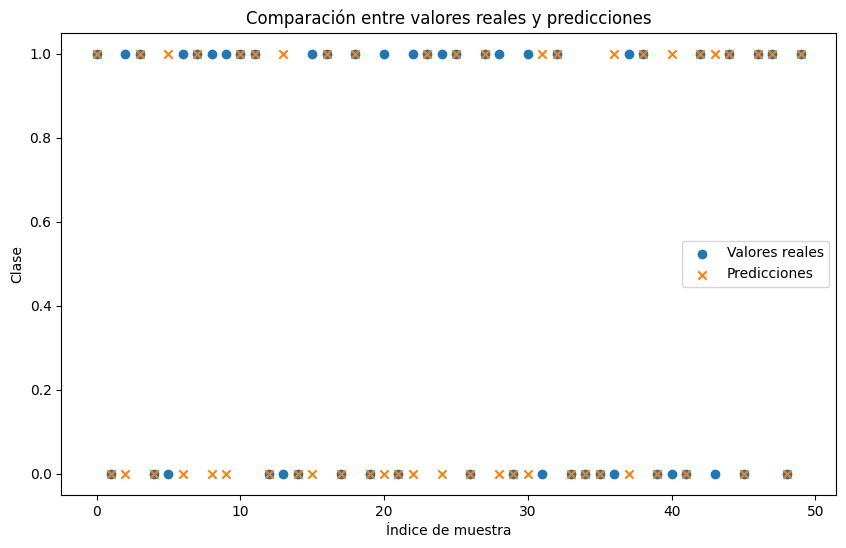

In [15]:
# GRAFICO COMPARATIVO
#
plt.figure(figsize=(10,6))  # Definimos tamaño de figura

# Graficamos primeros 50 valores reales
plt.scatter(range(50), y_test[:50], label="Valores reales", marker='o')

# Graficamos predicciones correspondientes
plt.scatter(range(50), y_pred[:50], label="Predicciones", marker='x')

plt.xlabel("Índice de muestra")  # Etiqueta del eje X
plt.ylabel("Clase")  # Etiqueta del eje Y
plt.title("Comparación entre valores reales y predicciones")  # Título del gráfico
plt.legend()  # Mostramos leyenda
plt.show()  # Mostrar gráfico






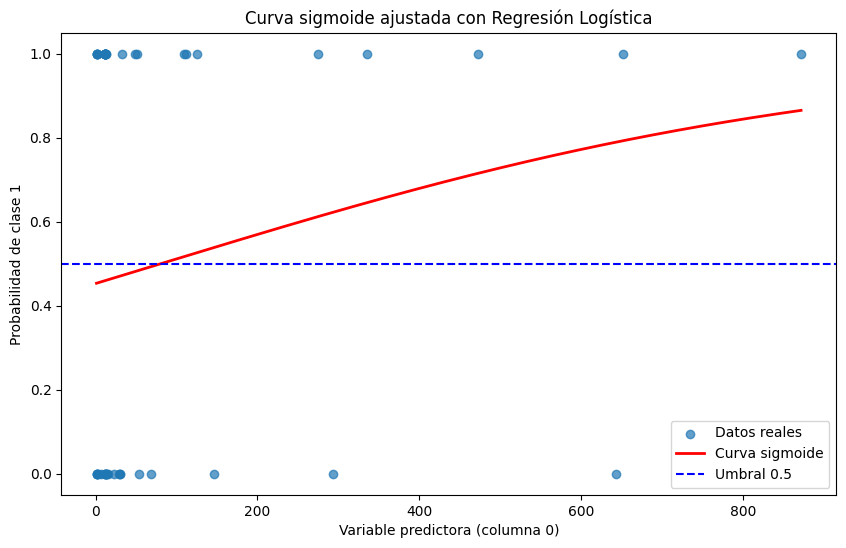

In [16]:
# Extraemos una variable predictora (por ejemplo, la primera columna)
X_var = X_test.iloc[:, 0]
y_var = y_test

# Obtenemos parámetros del modelo (intercepto y coeficiente de esa variable)
b0 = modelo.intercept_[0]
b1 = modelo.coef_[0][0]

# Definimos la función sigmoide
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

# Creamos un rango de valores para la variable
x_range = np.linspace(X_var.min(), X_var.max(), 200)

# Calculamos la sigmoide con los parámetros aprendidos
z = b0 + b1 * x_range
y_prob = sigmoide(z)

# Graficamos
plt.figure(figsize=(10,6))
plt.scatter(X_var, y_var, label="Datos reales", alpha=0.7)  # Puntos reales
plt.plot(x_range, y_prob, color="red", linewidth=2, label="Curva sigmoide")  # Curva sigmoide
plt.axhline(0.5, color="blue", linestyle="--", label="Umbral 0.5")  # Línea de decisión
plt.xlabel("Variable predictora (columna 0)")
plt.ylabel("Probabilidad de clase 1")
plt.title("Curva sigmoide ajustada con Regresión Logística")
plt.legend()
plt.show()


# Clasificación de nuevos registros

Como último ejercicio, vamos a inventar los datos de entrada de  navegación de un usuario ficticio que tiene estos valores:

- Tiempo Duración: 10
- Paginas visitadas: 3
- Acciones al navegar: 5
- Valoración: 9

Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [18]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
modelo.predict(X_new)

array([1])

# CONCLUSIONES

Intenta variar los valores para que la clasificación resultante sea con Windows y con Mac.

Luego, reflexiona sobre lo ejecutado y escribe una conclusión del ejercicio.